In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# สร้างข้อมูลจำลองที่มี 3 กลุ่ม
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.2, random_state=42)

# ปรับขนาดข้อมูลให้เป็นมาตรฐาน (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ฟังก์ชันช่วย Plot ผลลัพธ์ของ Clustering
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()


K-Means Silhouette Score: 0.8122


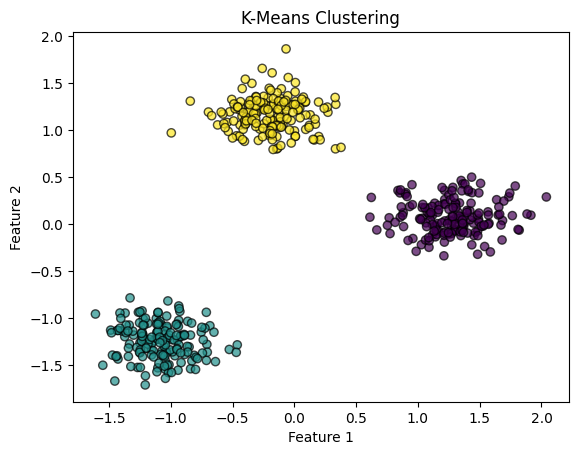

In [2]:
# K-Means Clustering

from sklearn.cluster import KMeans

# เลือกจำนวนกลุ่ม k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# ประเมินผลลัพธ์
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

# วาดผลลัพธ์ Clustering
plot_clusters(X_scaled, labels_kmeans, "K-Means Clustering")


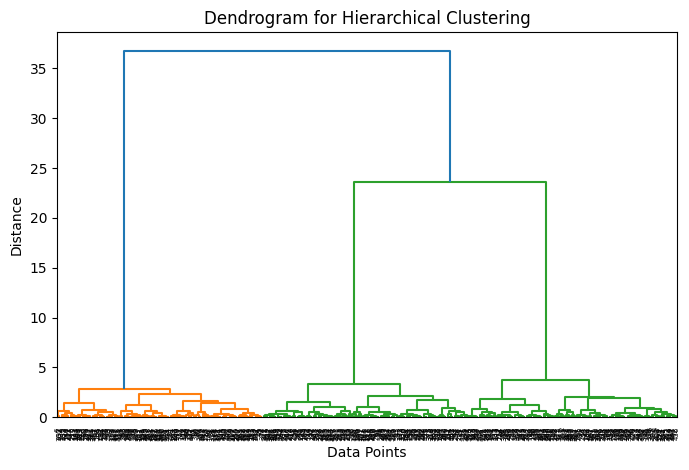

Hierarchical Clustering Silhouette Score: 0.8122


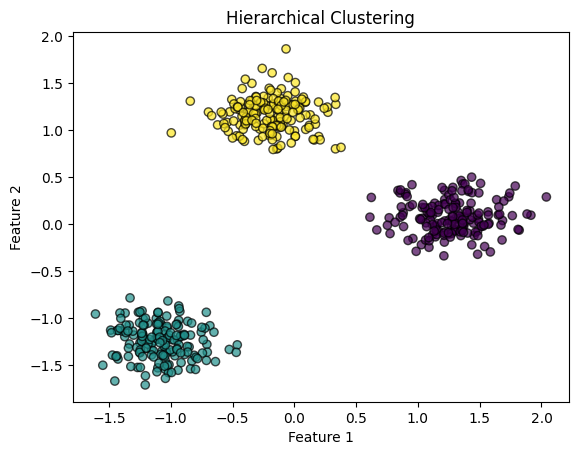

In [3]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# วาด Dendrogram เพื่อดูโครงสร้างของคลัสเตอร์
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# ใช้ Agglomerative Clustering กำหนดจำนวนกลุ่มเป็น 3
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hierarchical = hierarchical.fit_predict(X_scaled)

# ประเมินผลลัพธ์
silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")

# วาดผลลัพธ์ Clustering
plot_clusters(X_scaled, labels_hierarchical, "Hierarchical Clustering")


DBSCAN พบ 3 กลุ่ม (ไม่รวม outliers)
DBSCAN Silhouette Score: 0.8122


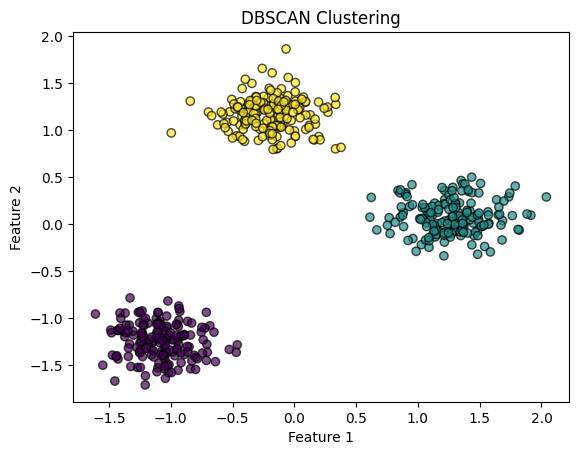

In [4]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN

# ใช้ค่า epsilon = 0.5 และ Min Samples = 5
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# DBSCAN มีค่า -1 สำหรับ outliers
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"DBSCAN พบ {n_clusters} กลุ่ม (ไม่รวม outliers)")

# คำนวณ Silhouette Score (ไม่นับ outliers)
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(X_scaled[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN ไม่สามารถคำนวณ Silhouette Score ได้ เนื่องจากพบเพียงกลุ่มเดียว")

# วาดผลลัพธ์ Clustering
plot_clusters(X_scaled, labels_dbscan, "DBSCAN Clustering")


GMM Silhouette Score: 0.8122


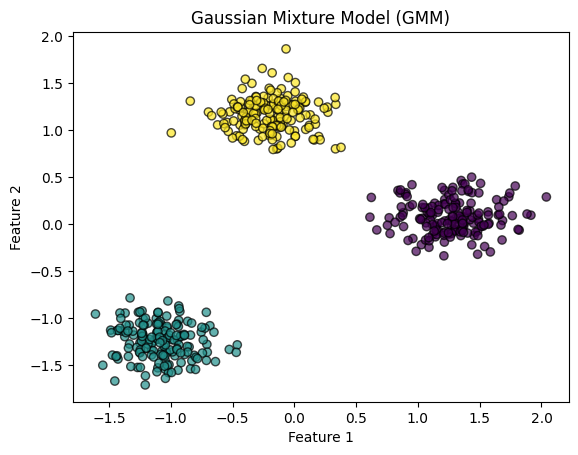

In [5]:
# Gaussian Mixture Models (GMM)

from sklearn.mixture import GaussianMixture

# สร้าง GMM โดยกำหนดจำนวนกลุ่มเป็น 3
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

# ประเมินผลลัพธ์
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f"GMM Silhouette Score: {silhouette_gmm:.4f}")

# วาดผลลัพธ์ Clustering
plot_clusters(X_scaled, labels_gmm, "Gaussian Mixture Model (GMM)")


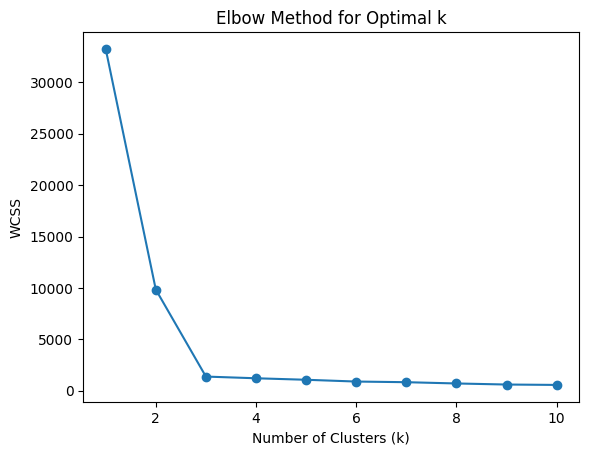

In [2]:
# Elbow Method of K-Means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # ค่า WCSS

# วาดกราฟ Elbow Method
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()
